Correlation between height and quality of the milk

In [80]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [81]:
# Import the dataset
data = pd.read_csv('height_dataset.csv', sep=';')
# Inspect the dataset
data.head()

,azienda agricola,zona,mucche in mungitura,altitudine,eta propietario,razza prevalente,alpeggio,data analisi,month,year,...,proteine,cellule somatiche x1000,carica batterica x1000,spore,crioscopia,lattosio,urea,caseine,media geometrica cellule somatiche x 1000,media geometrica carica batterica x 1000
0,AZ. AGR.COLLI MICHELE,Bassa Valtellina,70,218,42.0,NaN,NaN,4/1/2021,gen,2021,...,3.48,219,17,360,-0.520,4.95,18.5,2.73,221,15
1,AZ.AGR.ACQUISTAPACE PIERO,Bassa Valtellina,25,231,68.0,NaN,NaN,4/1/2021,gen,2021,...,3.44,150,7,1,-0.523,4.97,24.4,2.70,91,7
2,AZ.AGR.BETTIGA PIETRO,Lago Di Como,45,218,62.0,pezzata rossa,NaN,4/1/2021,gen,2021,...,3.63,107,17,3000,-0.528,4.99,25.1,2.85,130,16
3,AZ.AGR.CERRI VITTORE,Bassa Valtellina,24,262,63.0,NaN,NaN,4/1/2021,gen,2021,...,3.49,695,8,360,-0.524,4.99,15.9,2.73,237,6
4,AZ.AGR.COLLI GIOVANNI,Bassa Valtellina,25,218,52.0,bruna,NaN,4/1/2021,gen,2021,...,3.59,166,5,965,-0.518,4.87,18.2,2.81,245,7


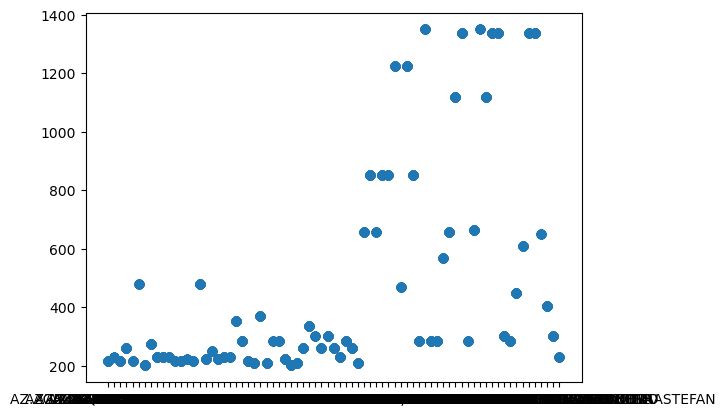

In [82]:
plt.scatter(data['azienda agricola'],data['altitudine'])

seems like we could make three groups to classify the height. 0-400; 400-1000; 1000-1400. Which could be called height Low, Medium and High.

Let's see the distribution of it before

In [83]:
# Import the dataset
dist = pd.read_csv('height-farm.csv', sep=';')
# Inspect the dataset
dist.head()

,azienda agricola,zona,altitudine
0,AZ. AGR.COLLI MICHELE,Bassa Valtellina,218
1,AZ.AGR.ACQUISTAPACE PIERO,Bassa Valtellina,231
2,AZ.AGR.BETTIGA PIETRO,Lago Di Como,218
3,AZ.AGR.CERRI VITTORE,Bassa Valtellina,262
4,AZ.AGR.COLLI GIOVANNI,Bassa Valtellina,218


(array([45.,  4.,  4.,  6.,  1.,  4.,  0.,  2.,  2.,  7.]),
 array([ 201. ,  315.9,  430.8,  545.7,  660.6,  775.5,  890.4, 1005.3,
        1120.2, 1235.1, 1350. ]),
 <BarContainer object of 10 artists>)

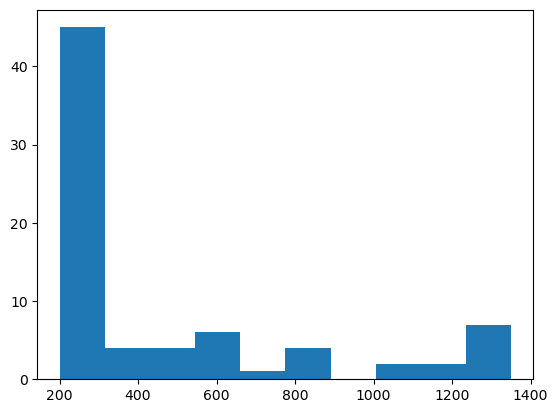

In [84]:
plt.hist(dist['altitudine'])

Looking at this, we can say we can make 3 groups: 0-500; 500-1000; 1000-1500

In [85]:
data['altitudine'][1]

231

In [86]:
data['Height Class'] = np.zeros(len(data))

In [87]:
for i in range(len(data)):
    if data['altitudine'][i]<500:
        data['Height Class'][i] = 'Low'
    elif data['altitudine'][i]>500 and data['altitudine'][i]<1000:
        data['Height Class'][i] = 'Medium'
    else:
        data['Height Class'][i] = 'High'

c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Let's check if it worked

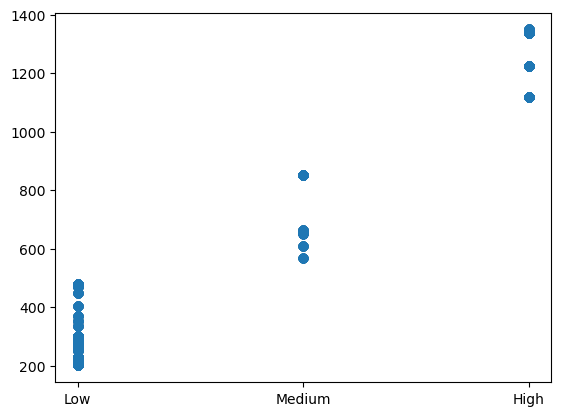

In [88]:
plt.scatter(data['Height Class'], data['altitudine'])

To study the correlation between height and quality of the milk, I first need to obtain the quality of the milk for each row

In [89]:
data['Quality'] = np.zeros(len(data))
data['Qcaseine'] = np.zeros(len(data))
data['Qcaricabatterica'] = np.zeros(len(data))
data['Qcellule'] = np.zeros(len(data))
data['Qspore'] = np.zeros(len(data))
data['Qgrasso'] = np.zeros(len(data))


In [90]:
#DEFINITION OF QUALITY 1

for i in range(len(data)):
#grasso
    if data['grasso'][i]<3.8:
        data['Quality'][i] -=1
    elif data['grasso'][i]>3.8:
        data['Quality'][i] +=1
        if data['grasso'][i] > 4.6:
            data['Quality'][i] +=1
#caseine
    if data['caseine'][i]<2.65:
        data['Quality'][i] -=1
    elif data['caseine'][i]>2.65:
        data['Quality'][i] +=1
#carica batterica
    if data['carica batterica x1000'][i]<24.999:
        data['Quality'][i] +=1
    elif data['carica batterica x1000'][i]>50.000:
        data['Quality'][i] -=1
        if data['carica batterica x1000'][i]>75.000:
            data['Quality'][i] -=1
            if data['carica batterica x1000'][i]>100.000:
                data['Quality'][i] -=1
#celule somatiche   
    if data['cellule somatiche x1000'][i]<200:
        data['Quality'][i] +=1
        
        if data['cellule somatiche x1000'][i]<150:
            data['Quality'][i] +=1
            
            if data['cellule somatiche x1000'][i]<100:
                data['Quality'][i] +=1
                
    elif data['cellule somatiche x1000'][i]>300:
        data['Quality'][i] -=1
        
        if data['cellule somatiche x1000'][i]>350:
            data['Quality'][i] -=1
            
            if data['cellule somatiche x1000'][i]>400:
                data['Quality'][i] -=1
                
#spores
    if data['spore'][i]<350:
        data['Quality'][i] +=1
        if data['spore'][i]<251:
            data['Quality'][i] +=1 
            if data['spore'][i]<151:
                data['Quality'][i] +=1
                if data['spore'][i]<76:
                    data['Quality'][i] +=1
    elif data['spore'][i]>500:
        data['Quality'][i] -=1
        if data['spore'][i]>700:
            data['Quality'][i] -=1
            if data['spore'][i]>1000:
                data['Quality'][i] -=1
                if data['spore'][i]>1500:
                    data['Quality'][i] -=1
                    if data['spore'][i]>2000:
                        data['Quality'][i] -=1
                        if data['spore'][i]>3000:
                            data['Quality'][i] -=1

c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\cavae\anaconda3\envs\

Now we have the quality defined. Now we need to see first correlations

In [91]:
data['Quality'].describe()

count    5675.0000
mean        3.8879
std         4.3090
min       -12.0000
25%         1.0000
50%         4.0000
75%         7.0000
max        11.0000
Name: Quality, dtype: float64

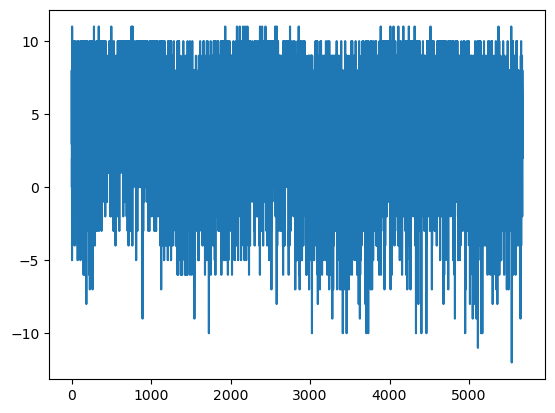

In [92]:
plt.plot(data['Quality'])

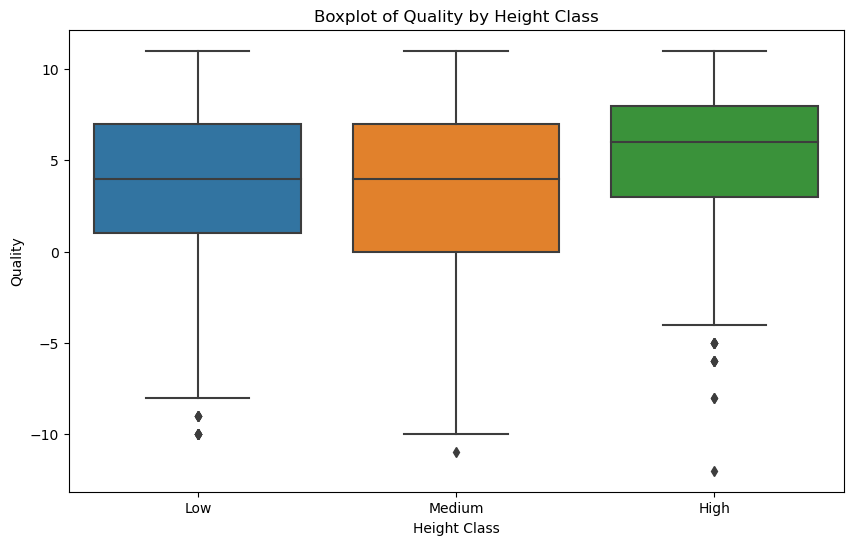

In [93]:
# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Height Class'], y=data['Quality'], data=data)

# Set plot labels and title
plt.xlabel('Height Class')
plt.ylabel('Quality')
plt.title('Boxplot of Quality by Height Class')

# Show the plot
plt.show()

c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


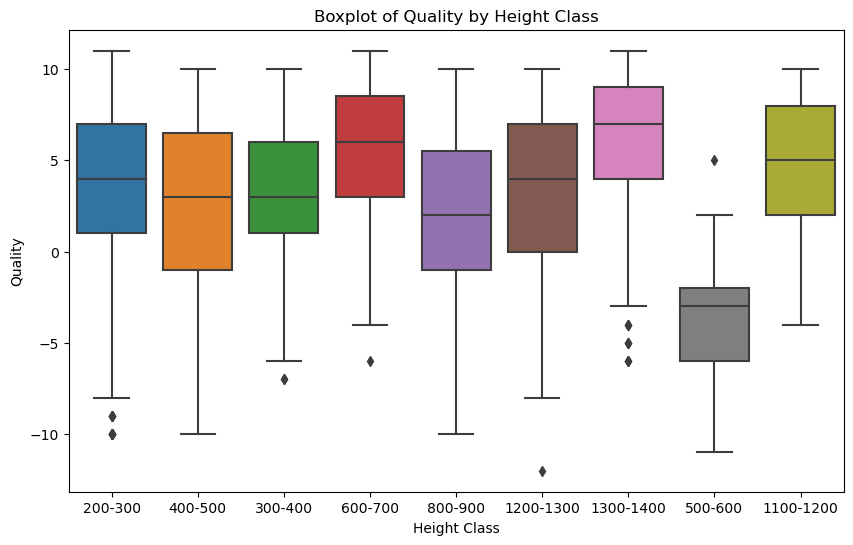

In [94]:
data['Height Class 3'] = np.zeros(len(data))
for i in range(len(data)):
    if data['altitudine'][i]<300:
        data['Height Class 3'][i] = '200-300'
    elif data['altitudine'][i]>300 and data['altitudine'][i]<400:
        data['Height Class 3'][i] = '300-400'
    elif data['altitudine'][i]>400 and data['altitudine'][i]<500:
        data['Height Class 3'][i] = '400-500'
    elif data['altitudine'][i]>500 and data['altitudine'][i]<600:
        data['Height Class 3'][i] = '500-600'
    elif data['altitudine'][i]>600 and data['altitudine'][i]<700:
        data['Height Class 3'][i] = '600-700'
    elif data['altitudine'][i]>700 and data['altitudine'][i]<800:
        data['Height Class 3'][i] = '700-800'
    elif data['altitudine'][i]>800 and data['altitudine'][i]<900:
        data['Height Class 3'][i] = '800-900'
    elif data['altitudine'][i]>900 and data['altitudine'][i]<1000:
        data['Height Class 3'][i] = '900-1000'
    elif data['altitudine'][i]>1000 and data['altitudine'][i]<1100:
        data['Height Class 3'][i] = '1000-1100'
    elif data['altitudine'][i]>1100 and data['altitudine'][i]<1200:
        data['Height Class 3'][i] = '1100-1200'
    elif data['altitudine'][i]>1200 and data['altitudine'][i]<1300:
        data['Height Class 3'][i] = '1200-1300'
    elif data['altitudine'][i]>1300 and data['altitudine'][i]<1400:
        data['Height Class 3'][i] = '1300-1400'
    elif data['altitudine'][i]>1400:
        data['Height Class 3'][i] = '>1400'


# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Height Class 3'], y=data['Quality'], data=data)

# Set plot labels and title
plt.xlabel('Height Class')
plt.ylabel('Quality')
plt.title('Boxplot of Quality by Height Class')

# Show the plot
plt.show()

In [95]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(data['Quality'][data['Height Class'] == 'Low'],
                                 data['Quality'][data['Height Class'] == 'Medium'],
                                 data['Quality'][data['Height Class'] == 'High'])

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Check if the p-value is less than the significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in quality between height classes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in quality between height classes.")

posthoc_result = pairwise_tukeyhsd(data['Quality'], data['Height Class'], alpha=0.05)

# Display the post-hoc test results
print("\nPost-hoc Tukey test results:")
print(posthoc_result)


F-statistic: 57.7424
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in quality between height classes.

Post-hoc Tukey test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -1.6338    0.0 -2.0144 -1.2531   True
  High Medium  -1.9756    0.0 -2.4736 -1.4775   True
   Low Medium  -0.3418 0.1001 -0.7322  0.0486  False
----------------------------------------------------


In [96]:
from scipy.stats import bartlett


# Extract quality values for each group
groups = [data['Quality'][data['Height Class'] == class_].values for class_ in data['Height Class'].unique()]

# Perform Bartlett's test for equal variances
statistic, p_value = bartlett(*groups)

# Print the results
print(f'Bartlett\'s Test Statistic: {statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Check if the p-value is greater than the significance level (alpha)
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: Variances are approximately equal.")
else:
    print("Reject the null hypothesis: Variances are not equal.")


Bartlett's Test Statistic: 18.0424
P-value: 0.0001
Reject the null hypothesis: Variances are not equal.


In [97]:
pip install pingouin


Note: you may need to restart the kernel to use updated packages.


In [98]:
from pingouin import welch_anova

# Perform Welch's ANOVA
result = welch_anova(data=data, dv='Quality', between='Height Class')

# Print the results
print(result)

         Source  ddof1      ddof2        F       p-unc   np2
0  Height Class      2  1452.4874  65.1785  7.8040e-28  0.02


In [99]:
from pingouin import pairwise_tukey


# Perform Welch's ANOVA
result_anova = welch_anova(data=data, dv='Quality', between='Height Class')

# Print the ANOVA results
print(result_anova)

# Perform post-hoc Tukey test for multiple comparisons
posthoc_result = pairwise_tukey(data=data, dv='Quality', between='Height Class')

# Display the post-hoc test results
print("\nPost-hoc Tukey test results:")
print(posthoc_result)


         Source  ddof1      ddof2        F       p-unc   np2
0  Height Class      2  1452.4874  65.1785  7.8040e-28  0.02

Post-hoc Tukey test results:
      A       B  mean(A)  mean(B)    diff      se        T     p-tukey  hedges
0  High     Low   5.3293   3.6956  1.6338  0.1624  10.0622  3.8844e-12  0.3873
1  High  Medium   5.3293   3.3538  1.9756  0.2124   9.2997  3.8844e-12  0.4653
2   Low  Medium   3.6956   3.3538  0.3418  0.1665   2.0525  1.0005e-01  0.0791


In [100]:
low_data = data[data['Height Class'] == 'Low'].copy()
medium_data = data[data['Height Class'] == 'Medium'].copy()
high_data = data[data['Height Class'] == 'High'].copy()

monthly_quality_height = pd.DataFrame()

In [101]:
# Assuming 'Quality' is the column containing quality values
result_low = low_data.groupby('month-year')['Quality'].mean().reset_index()
result_medium = medium_data.groupby('month-year')['Quality'].mean().reset_index()
result_high = high_data.groupby('month-year')['Quality'].mean().reset_index()

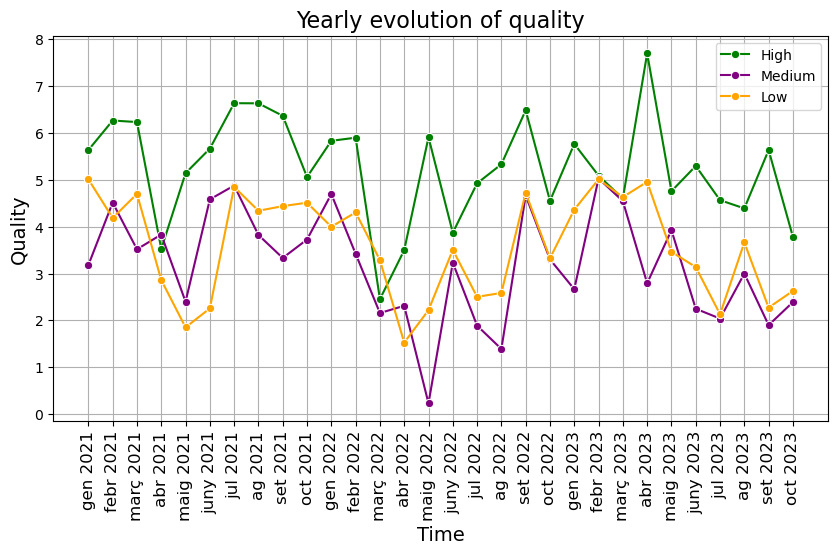

In [102]:
# Define the desired order for the x-axis labels
desired_order = ["gen 2021","febr 2021","març 2021","abr 2021","maig 2021","juny 2021","jul 2021","ag 2021","set 2021","oct 2021","gen 2022",
"febr 2022","març 2022","abr 2022","maig 2022","juny 2022","jul 2022","ag 2022","set 2022","oct 2022","gen 2023","febr 2023","març 2023","abr 2023",
"maig 2023","juny 2023","jul 2023","ag 2023","set 2023","oct 2023"]

# Create a basic plot using seaborn with the desired order
plt.figure(figsize=(10,5))
sns.lineplot(x=desired_order, y=result_high['Quality'], color = 'green', marker = 'o', label = 'High')
sns.lineplot(x=desired_order, y=result_medium['Quality'], color = 'purple', marker = 'o',label = 'Medium')
sns.lineplot(x=desired_order, y=result_low['Quality'], color = 'orange', marker = 'o',label = 'Low')
plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Quality', fontsize=14)
plt.legend()
plt.title('Yearly evolution of quality', fontsize=16)
plt.grid()
plt.show()

Study on the evolution of quality over time

p-value of the Shapiro-Wilk test: 0.042


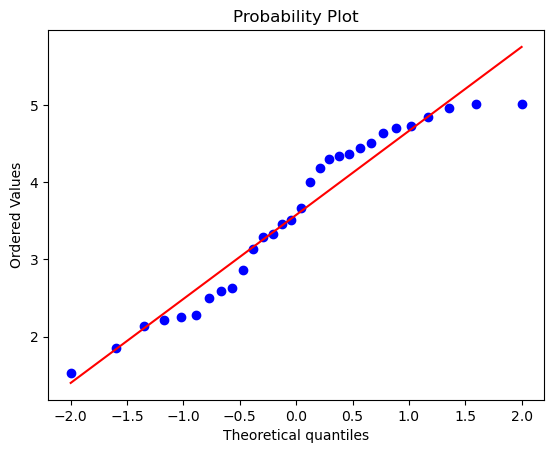

In [103]:
#Check normality
_, p_value_SW = stats.shapiro(result_low['Quality'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)
# QQ-plot
stats.probplot(result_low['Quality'], dist='norm', plot=plt)
plt.show()


low is the only one not normal

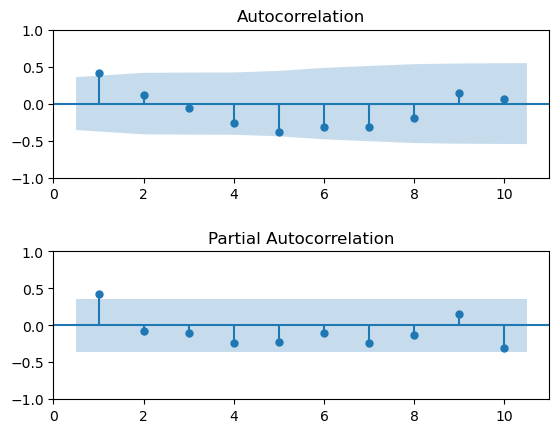

In [104]:
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(result_low['Quality'], lags = int(len(result_medium)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(result_low['Quality'], lags = int(len(result_medium)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()



low is autocorrelated al lag 1 whereas high and medium no

In [105]:
import qda

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=1, d=0, q=0

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term   Coef  SE Coef  T-Value    P-Value
const 3.5881   0.3093  11.5994 4.1506e-31
ar.L1 0.4437   0.2160   2.0543 3.9949e-02

RESIDUAL SUM OF SQUARES
-------------------------
  DF      SS     MS
28.0 25.5674 0.9131

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12     17.6610   0.1264
  24     26.4179   0.3323
Shapiro-Wilk test p-value = 0.774


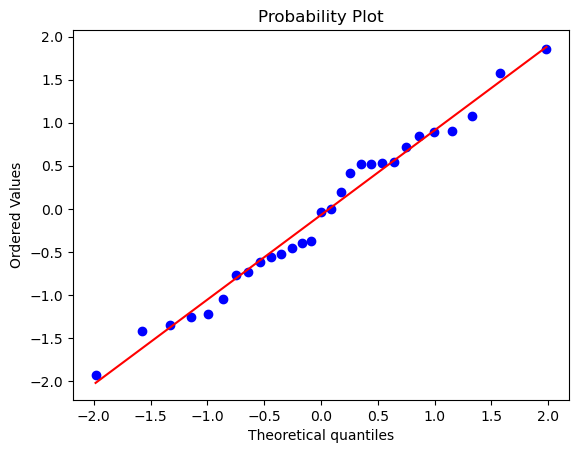

In [106]:
x = result_low['Quality']
model = qda.ARIMA(x, order=(1,0,0), add_constant = True) 
qda.ARIMAsummary(model)

#Extract the residuals
residuals = model.resid[1:]

# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


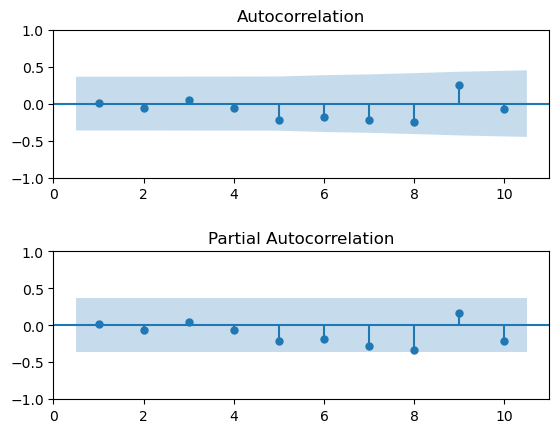

In [107]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid[1:], lags = int(len(model.resid)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid[1:], lags = int(len(model.resid)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


The model is valid. The function is: 
Quality(t) = 3.58 + 0.4437*Quality(t-1) for low height areas

Shapiro-Wilk test p-value on the residuals = 0.774


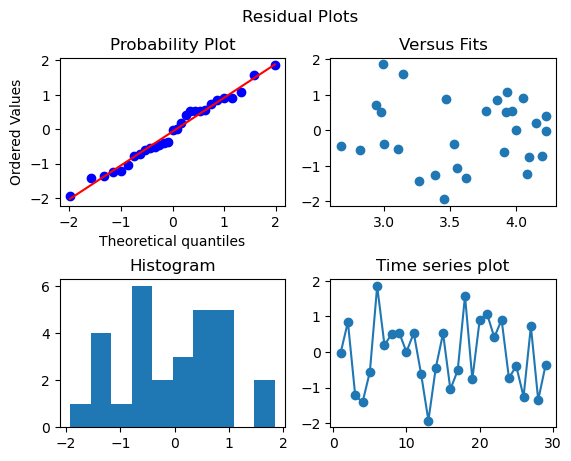

In [108]:
#NORMALITY OF RESIDUALS

fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')

axs[0,0].set_title('Normal probability plot')
stats.probplot(model.resid[1:], dist="norm", plot=axs[0,0])

axs[0,1].set_title('Versus Fits')
axs[0,1].scatter(model.fittedvalues[1:], model.resid[1:])

fig.subplots_adjust(hspace=0.5)

axs[1,0].set_title('Histogram')
axs[1,0].hist(model.resid[1:])

axs[1,1].set_title('Time series plot')
axs[1,1].plot(np.arange(1, len(model.resid[1:])+1), model.resid[1:], 'o-')

_, pval_SW_res = stats.shapiro(model.resid[1:])
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)


MONETARY VALUE

In [109]:
data['Monetary'] = np.zeros(len(data))
data['pos'] = np.zeros(len(data))
data['neg'] = np.zeros(len(data))
p = 0.8
n = -0.3

for i in range(len(data)):
#grasso
    if data['grasso'][i]<3.8:
        data['neg'][i] -=1
    elif data['grasso'][i]>3.8:
        data['pos'][i] +=1
        if data['grasso'][i] > 4.6:
            data['pos'][i] +=1
#caseine
    if data['caseine'][i]<2.65:
        data['neg'][i] -=1
    elif data['caseine'][i]>2.65:
        data['pos'][i] +=1
#carica batterica
    if data['carica batterica x1000'][i]<24.999:
        data['pos'][i] +=1
    elif data['carica batterica x1000'][i]>50.000:
        data['neg'][i] -=1
        if data['carica batterica x1000'][i]>75.000:
            data['neg'][i] -=1
            if data['carica batterica x1000'][i]>100.000:
                data['neg'][i] -=1
#celule somatiche   
    if data['cellule somatiche x1000'][i]<200:
        data['pos'][i] +=1
        
        if data['cellule somatiche x1000'][i]<150:
            data['pos'][i] +=1
            
            if data['cellule somatiche x1000'][i]<100:
                data['pos'][i] +=1
                
    elif data['cellule somatiche x1000'][i]>300:
        data['neg'][i] -=1
        
        if data['cellule somatiche x1000'][i]>350:
            data['neg'][i] -=1
            
            if data['cellule somatiche x1000'][i]>400:
                data['neg'][i] -=1
                
#spores
    if data['spore'][i]<350:
        data['pos'][i] +=1
        if data['spore'][i]<251:
            data['pos'][i] +=1 
            if data['spore'][i]<151:
                data['pos'][i] +=1
                if data['spore'][i]<76:
                    data['pos'][i] +=1
    elif data['spore'][i]>500:
        data['neg'][i] -=1
        if data['spore'][i]>700:
            data['neg'][i] -=1
            if data['spore'][i]>1000:
                data['neg'][i] -=1
                if data['spore'][i]>1500:
                    data['neg'][i] -=1
                    if data['spore'][i]>2000:
                        data['neg'][i] -=1
                        if data['spore'][i]>3000:
                            data['neg'][i] -=1

c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\cavae\anaconda3\envs\qda\lib\site-packag

c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\cavae\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

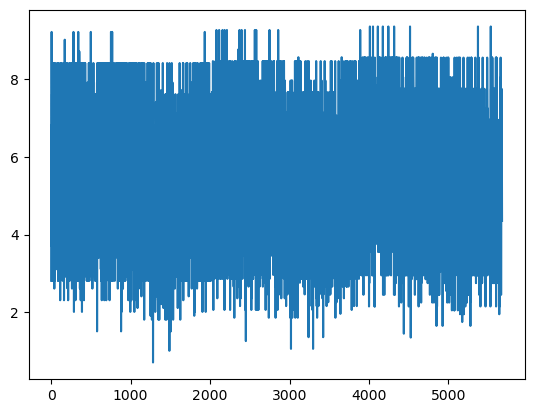

In [110]:
for i in range(len(data)):
    if data['year'][i] == 2021:
        data['Monetary'][i] = 0.41+data['pos'][i]*p+data['neg'][i]*n
    elif data['year'][i] == 2022:
        data['Monetary'][i] = 0.46+data['pos'][i]*p+data['neg'][i]*n
    elif data['year'][i] == 2023:
        data['Monetary'][i] = 0.55+data['pos'][i]*p+data['neg'][i]*n

plt.plot(data['Monetary'])
    


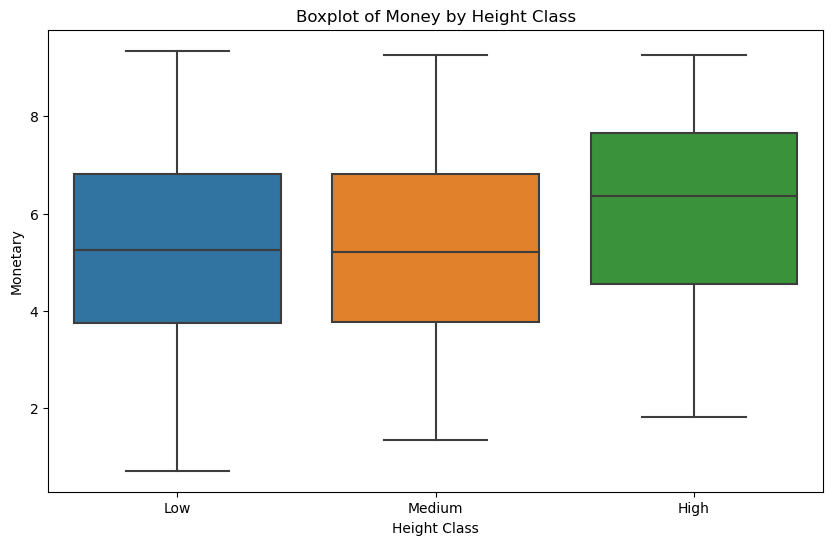

In [112]:
# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Height Class'], y=data['Monetary'], data=data)

# Set plot labels and title
plt.xlabel('Height Class')
plt.ylabel('Monetary')
plt.title('Boxplot of Money by Height Class')

# Show the plot
plt.show()